In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tbparse import SummaryReader
import torch
os.chdir('../')
print(os.getcwd())
from src.data.loader import load_vae_hp_params, load_gnn_hp_params
from src.viz.plotters import Parallel_Coordinates

/Users/gbemidebe/Documents/GitHub/knnGuidedDesign


In [3]:
log_vae_dir = "reports/VAE/hyper_search_logs/knnMoleculeVAE/version_1/"
vae_reader = SummaryReader(log_vae_dir, pivot=True)
vae_df = vae_reader.scalars

In [4]:
vae_params = ['enc_hidden_dim_1', 'enc_hidden_dim_2', 'dec_hidden_dim_1', 'dec_hidden_dim_2',
             'learning_rate', 'dropout', 'num_epochs', 'seed', 'batch_size', 'trn_loss', 'val_loss']

vae_ignore_list = ['input_dim', 'max_len', 'latent_dim', 'width_dim', 'height_dim', 'split_ratio']

vae_hpp_df = load_vae_hp_params(path="reports/VAE/hyper_search_logs/knnMoleculeVAE/version_*",
                             params=vae_params, ignore_list=vae_ignore_list)

Processing reports/VAE/hyper_search_logs/knnMoleculeVAE/version_0
Processing reports/VAE/hyper_search_logs/knnMoleculeVAE/version_1
Processing reports/VAE/hyper_search_logs/knnMoleculeVAE/version_10
Processing reports/VAE/hyper_search_logs/knnMoleculeVAE/version_11
Processing reports/VAE/hyper_search_logs/knnMoleculeVAE/version_12
Processing reports/VAE/hyper_search_logs/knnMoleculeVAE/version_13
Processing reports/VAE/hyper_search_logs/knnMoleculeVAE/version_14
Processing reports/VAE/hyper_search_logs/knnMoleculeVAE/version_15
Processing reports/VAE/hyper_search_logs/knnMoleculeVAE/version_16
Processing reports/VAE/hyper_search_logs/knnMoleculeVAE/version_17
Processing reports/VAE/hyper_search_logs/knnMoleculeVAE/version_18
Processing reports/VAE/hyper_search_logs/knnMoleculeVAE/version_19
Processing reports/VAE/hyper_search_logs/knnMoleculeVAE/version_2
Processing reports/VAE/hyper_search_logs/knnMoleculeVAE/version_20
Processing reports/VAE/hyper_search_logs/knnMoleculeVAE/version_2

In [5]:
vae_cols = ['enc_hd_1', 'enc_hd_2', 'dec_hd_1', 'dec_hd_2', 'lr', 'dropout', 'num_epochs', 'seed', 'batch', 'trn_loss', 'val_loss']

Task: find columns whose difference is less than 0.01 for both loss and accuracy
<ol>
<li>overfitting is when the training loss is much lower than the validation loss and the training accuracy is much higher than the validation accuracy</li>
<li>underfitting is when the training loss is much higher than the validation loss and the training accuracy is much lower than the validation accuracy</li>
<li>deally, the training and validation loss and accuracy should be close to each other</li>
</ol>

In [6]:
diff_loss = (vae_hpp_df['trn_loss'] - vae_hpp_df['val_loss'])
vae_hpp_df[(diff_loss < 0.01)]

,run,enc_hidden_dim_1,enc_hidden_dim_2,dec_hidden_dim_1,dec_hidden_dim_2,learning_rate,dropout,num_epochs,seed,batch_size,trn_loss,val_loss
2,run_2,64,64,64,64,0.0010,0.0,150,2050,8,71.521156,76.603546
3,run_3,64,64,64,64,0.0010,0.0,150,2050,8,72.428726,77.910713
4,run_4,64,64,64,64,0.0010,0.0,500,2050,8,69.691940,74.711967
5,run_5,64,64,64,64,0.0010,0.1,500,2050,8,71.953430,75.757195
12,run_12,16,16,16,16,0.0010,0.0,150,2050,8,83.113380,92.110748
34,run_34,256,256,256,256,0.0001,0.1,1000,2050,16,139.648346,147.421692
50,run_50,256,256,256,256,0.0010,0.2,500,2050,8,74.300293,77.072433
55,run_55,32,32,32,32,0.0010,0.4,200,2050,32,335.204285,358.626312
75,run_75,64,64,64,64,0.0010,0.4,200,2050,8,76.426514,81.057388
78,run_78,16,16,16,16,0.0010,0.1,150,2050,8,83.162682,92.133064


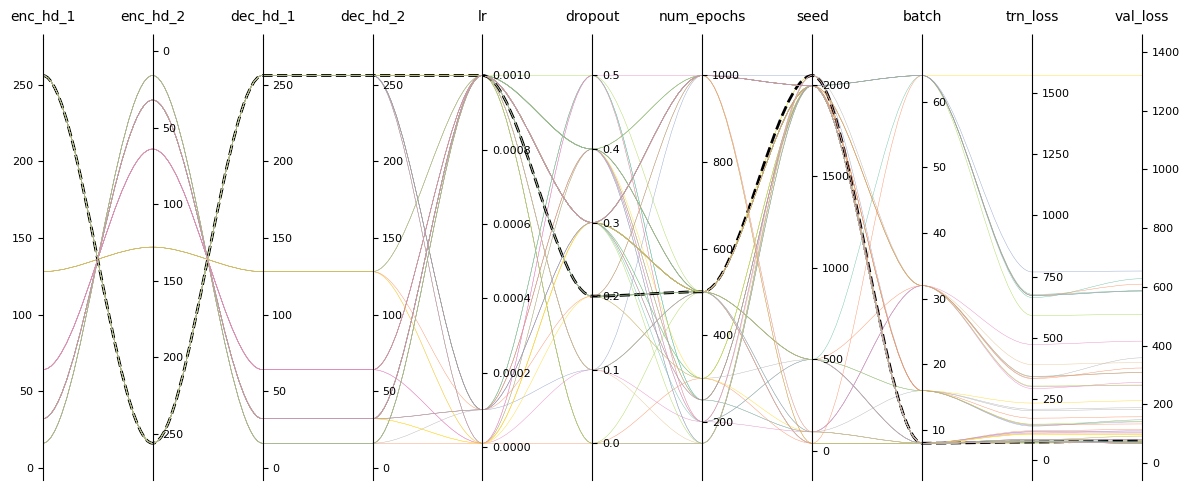

In [7]:
fig,ax = plt.subplots(figsize=(12,5))
pcd = Parallel_Coordinates(df=vae_hpp_df, cols=vae_cols, best_itr=50,ax=ax, wrap_label=False).plot()
plt.tight_layout()
plt.savefig("reports/pretrainVAE_hyperparams.png", dpi=600, facecolor='w', edgecolor='none',bbox_inches='tight')
plt.show()

# GNN

In [8]:
log_gnn_dir = "reports/GNN/hyper_search_logs/knnMoleculeGNN/version_100/"
gnnreader = SummaryReader(log_gnn_dir, pivot=True)
df_gnn = gnnreader.scalars

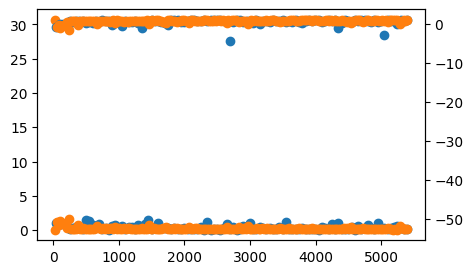

In [9]:
fig, axs = plt.subplots(figsize=(5, 3))
axs.scatter(df_gnn['step'], df_gnn['train_loss'], label='train_loss')
axs.scatter(df_gnn['step'], df_gnn['val_loss'], label='val_loss')
axs_ = axs.twinx()
axs_.scatter(df_gnn['step'], df_gnn['train_acc'], label='train_acc')
axs_.scatter(df_gnn['step'], df_gnn['val_acc'], label='val_acc')
plt.show()

In [10]:
gnn_params = ['hidden_fcn_dim', 'hidden_gcn_dim', 'learning_rate', 'n_fcn_layers',
             'n_gcn_layers', 'num_epochs', 'seed', 'seed', 'batch_size', 
          'trn_loss', 'val_loss', 'trn_acc', 'val_acc']

gnn_ignore_list = ['split', 'device']
gnn_hpp_df = load_gnn_hp_params(path="reports/GNN/hyper_search_logs/knnMoleculeGNN/version_*",
                             params=gnn_params, ignore_list=gnn_ignore_list)

Processing reports/GNN/hyper_search_logs/knnMoleculeGNN/version_0
Processing reports/GNN/hyper_search_logs/knnMoleculeGNN/version_1
Processing reports/GNN/hyper_search_logs/knnMoleculeGNN/version_10
Processing reports/GNN/hyper_search_logs/knnMoleculeGNN/version_100
Processing reports/GNN/hyper_search_logs/knnMoleculeGNN/version_101
Processing reports/GNN/hyper_search_logs/knnMoleculeGNN/version_102
Processing reports/GNN/hyper_search_logs/knnMoleculeGNN/version_103
Processing reports/GNN/hyper_search_logs/knnMoleculeGNN/version_104
Processing reports/GNN/hyper_search_logs/knnMoleculeGNN/version_105
Processing reports/GNN/hyper_search_logs/knnMoleculeGNN/version_106
Processing reports/GNN/hyper_search_logs/knnMoleculeGNN/version_107
Processing reports/GNN/hyper_search_logs/knnMoleculeGNN/version_108
Processing reports/GNN/hyper_search_logs/knnMoleculeGNN/version_109
Processing reports/GNN/hyper_search_logs/knnMoleculeGNN/version_11
Processing reports/GNN/hyper_search_logs/knnMoleculeGN

In [11]:
gnn_cols = ['hd_fc', 'hd_gc', 'lr', 'n_fc', 'n_gc', 'num_epochs', 'seed', 'batch', 'trn_loss', 'val_loss', 'trn_acc', 'val_acc']

In [15]:
# find columns whose difference is less than 0.01 for both loss and accuracy
# overfitting is when the training loss is much lower than the validation loss and the training accuracy is much higher than the validation accuracy
# underfitting is when the training loss is much higher than the validation loss and the training accuracy is much lower than the validation accuracy
# ideally, the training and validation loss and accuracy should be close to each other
diff_loss = (gnn_hpp_df['trn_loss'] - gnn_hpp_df['val_loss'])
diff_acc = (gnn_hpp_df['trn_acc'] - gnn_hpp_df['val_acc'])
gnn_hpp_df[(diff_loss < 0.02) & (diff_acc < 0.02)]

,run,hidden_fcn_dim,hidden_gcn_dim,learning_rate,n_fcn_layers,n_gcn_layers,num_epochs,seed,batch_size,trn_loss,val_loss,trn_acc,val_acc
57,run_57,256,128,0.001,2,4,100,42,64,0.064546,0.088221,0.868238,0.875133
68,run_68,512,128,0.001,1,4,100,42,64,0.089229,0.084753,0.872326,0.880042
114,run_114,512,128,0.001,1,4,100,42,64,0.089229,0.084753,0.872326,0.880042
115,run_115,512,128,0.001,2,5,100,42,64,0.099568,0.094046,0.842806,0.866889
117,run_117,512,128,0.001,1,4,100,42,64,0.089229,0.084753,0.872326,0.880042


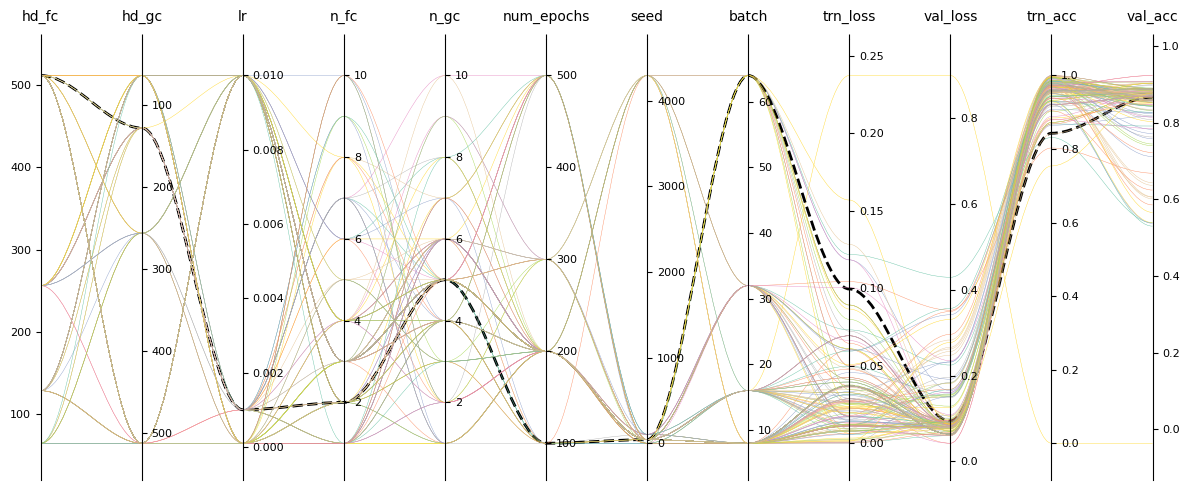

In [16]:
fig, ax = plt.subplots(figsize=(12,5))
gnn_pc = Parallel_Coordinates(df=gnn_hpp_df, cols=gnn_cols, best_itr=115,ax=ax, wrap_label=False).plot()
plt.tight_layout()
plt.savefig("reports/pretrainGNN_hyperparams.png", dpi=600, facecolor='w', edgecolor='none',bbox_inches='tight')
plt.show()